In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

import sys
sys.path.insert(0, '../src')
from distance_functions import df_distance, L2_norm, df_L2_norm

Load the 2D UMAP latent space data into a pandas dataframe. This will be the main dataframe that is called throughout this notebook as we refine the analysis or look at specific subsets of the data. The first several columns are image metadata (`uuid`, `run_name`, `band`, `look_angle`, `polarization`, `inclination_angle`, `contains_wake`, `augmnt`) and the remaining columns are the UMAP latent space components using different values of [n_neighbors](https://umap-learn.readthedocs.io/en/latest/parameters.html#n-neighbors). For a column with name `umapX_Y`, the data is for component X using Y neighbors. We found 200 neighbors to be the best option because higher n_neighbor values makes UMAP look at larger scale features in the latent space (please see the UMAP site on [n_neighbors](https://umap-learn.readthedocs.io/en/latest/parameters.html#n-neighbors) for more information). This notebook focuses on the `umap1_200` and `umap2_200` columns.

In [2]:
file_path = "../umap_rotation_2D.csv"
main_df = pd.read_csv(file_path)
main_df = main_df.drop('Unnamed: 0', axis='columns')
main_df

,uuid,run_name,band,look_angle,polarization,inclination_angle,contains_wake,augmnt,umap1_5,umap2_5,umap1_30,umap2_30,umap1_100,umap2_100,umap1_200,umap2_200
0,0,0.0Calm,C,0.0,vv,30.0,0,rotation_0,-5.172347,-16.072998,16.482002,10.297459,14.382402,-1.417823,11.904672,-4.348839
1,1,0.0Calm,C,0.0,vv,40.0,0,rotation_0,-5.183877,-16.062038,16.477854,10.299981,14.374737,-1.400280,11.963057,-4.327825
2,2,0.0Calm,C,0.0,vv,50.0,0,rotation_0,-5.155079,-16.087862,16.487482,10.292768,14.396134,-1.363641,11.973593,-4.314721
3,3,0.0Calm,C,0.0,vv,60.0,0,rotation_0,-5.083856,-16.146072,16.688047,10.160774,14.265025,-1.772344,11.875062,-4.719934
4,4,0.0Calm,C,0.0,hh,30.0,0,rotation_0,-5.170410,-16.074646,16.483614,10.296031,14.391457,-1.384969,11.934575,-4.331480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8731,219,1.5Following,X,270.0,vv,60.0,1,rotation_180,14.271860,-11.682961,9.635513,-3.967858,11.614323,-2.224389,9.315703,-2.650884
8732,220,1.5Following,X,270.0,hh,30.0,1,rotation_180,14.269261,-11.685315,9.658463,-3.991735,11.617397,-2.220817,9.309006,-2.645521
8733,221,1.5Following,X,270.0,hh,40.0,1,rotation_180,14.247194,-11.706433,9.793388,-4.130951,11.569376,-2.265150,9.235010,-2.590308
8734,222,1.5Following,X,270.0,hh,50.0,1,rotation_180,14.271366,-11.683272,9.664319,-3.997435,11.617974,-2.220639,9.311778,-2.647105


## Plotting the Latent Space

This section plots the latent space of the data. In the first plot we take a look at the augmentation applied (color) and the band (shape) of the images.

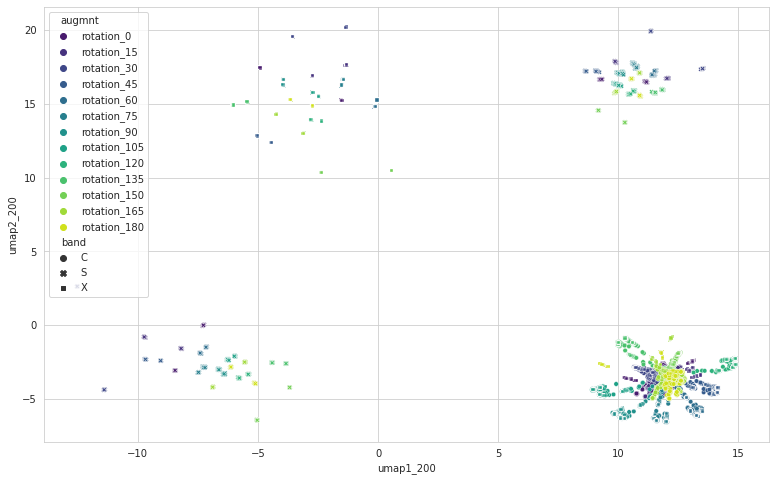

In [3]:
# plot results
sns.set_style("whitegrid")
fig, axs = plt.subplots(1, 1, figsize=(13, 8))
hue = np.array([main_df["augmnt"].values]).flatten()
sns.scatterplot(data=main_df, x="umap1_200", y="umap2_200", ax=axs,
                hue="augmnt", palette='viridis', style='band', s=20)
plt.show()

This next plot is the same data as the previous, but we color the points by the band and use shapes for the look angles. Notice that the C-band and the 90&deg; and 270&deg; X-band data points align in the bottom right, while the S-band and the 0&deg; and 180&deg; X-band points are separate and isolated.

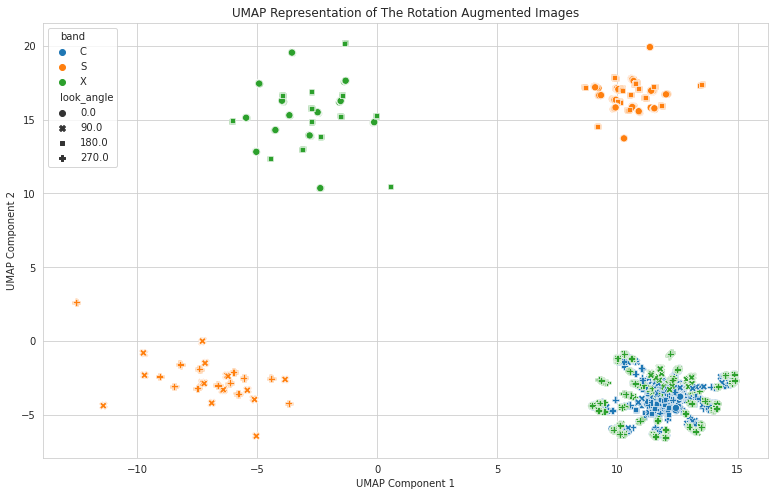

In [4]:
# plot results
sns.set_style("whitegrid")
fig, axs = plt.subplots(1, 1, figsize=(13, 8))
sns.scatterplot(data=main_df, x="umap1_200", y="umap2_200", ax=axs,
                hue="band", style='look_angle', s=50)
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("UMAP Representation of The Rotation Augmented Images")
plt.show()

These next two plots are S-band and X-band only used in the paper

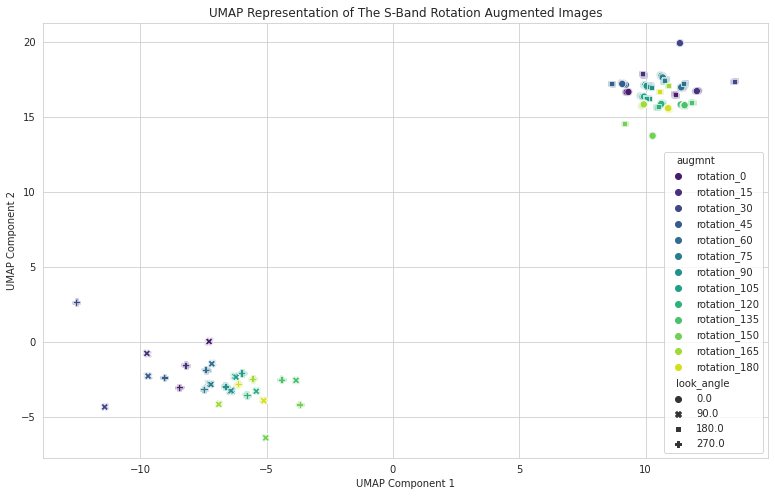

In [5]:
df = main_df[main_df["band"] == "S"]
# df = main_df.query("band == 'S' and (look_angle == 0 or look_angle == 180)")
# df = main_df.query("band == 'S' and (look_angle == 90 or look_angle == 270)")
fig, axs = plt.subplots(1, 1, figsize=(13, 8))
hue = np.array([df["augmnt"].values]).flatten()
sns.scatterplot(data=df, x="umap1_200", y="umap2_200", ax=axs,
                hue="augmnt", style="look_angle", palette='viridis', s=50)
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("UMAP Representation of The S-Band Rotation Augmented Images")
plt.show()

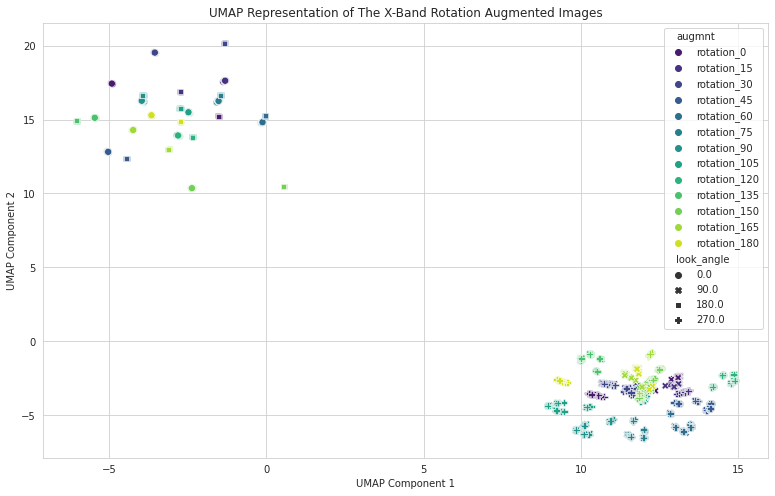

In [6]:
df = main_df[main_df["band"] == "X"]
fig, axs = plt.subplots(1, 1, figsize=(13, 8))
hue = np.array([df["augmnt"].values]).flatten()
sns.scatterplot(data=df, x="umap1_200", y="umap2_200", ax=axs,
                hue="augmnt", style="look_angle", palette='viridis', s=50)
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("UMAP Representation of The X-Band Rotation Augmented Images")
plt.show()

## C-Band Distances

This section starts by calculating the mean location for each augmentation set of C-Band, then plots them onto the C-Band latent space and uses them to calculate distances from the 90&deg; rotated set.

In [7]:
# calculate the mean location for each augmented set in C

df = main_df[main_df["band"] == "C"]
# df = df[df["contains_wake"] == 1]
features = ["uuid", "run_name", "band", "look_angle", "polarization",
            "inclination_angle", "contains_wake", "augmnt"]
df_200 = df[features + [x for x in df.columns if "_200" in x]]
df_200 = df_200.groupby(by="augmnt").mean()
df_200["angle"] = df_200.index
df_200["angle"] = [float(x.split("_")[-1]) for x in df_200["angle"].values]
df_200

,uuid,look_angle,inclination_angle,contains_wake,umap1_200,umap2_200,angle
augmnt,,,,,,,
rotation_0,111.5,135.0,45.0,0.857143,11.793560,-3.816301,0.0
rotation_105,111.5,135.0,45.0,0.857143,9.811870,-4.273427,105.0
rotation_120,111.5,135.0,45.0,0.857143,14.200827,-2.719481,120.0
rotation_135,111.5,135.0,45.0,0.857143,10.605905,-1.619889,135.0
rotation_15,111.5,135.0,45.0,0.857143,11.689306,-3.718559,15.0
rotation_150,111.5,135.0,45.0,0.857143,12.303023,-2.556585,150.0
rotation_165,111.5,135.0,45.0,0.857143,12.090919,-3.730299,165.0
rotation_180,111.5,135.0,45.0,0.857143,12.332351,-3.862325,180.0
rotation_30,111.5,135.0,45.0,0.857143,11.211303,-3.086617,30.0


Then those points are plotted with the C-band only data. Arrows are added to show the direction of increasing rotation angle of the augmented sets.

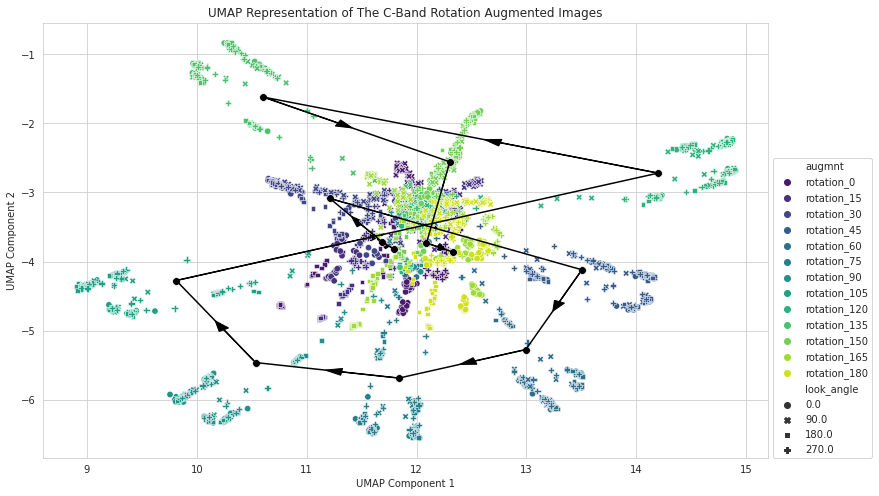

In [8]:
# df_200 = df_200.sort_values(by="angle")
# fig, axs = plt.subplots(1, 1, figsize=(13, 8))
# sns.lineplot(x=df_200["umap1_200"], y=df_200["umap2_200"], sort=False, color='k', lw=1)
# sns.scatterplot(data=df, x="umap1_200", y="umap2_200", ax=axs, hue="augmnt", palette='viridis', s=10)
# sns.scatterplot(data=df_200, x="umap1_200", y="umap2_200", ax=axs, color='k', s=50)
# plt.show()


df_200 = df_200.sort_values(by="angle")
fig, axs = plt.subplots(1, 1, figsize=(13, 8))
sns.lineplot(x=df_200["umap1_200"], y=df_200["umap2_200"], sort=False, color='k', lw=1.5)
x=df_200["umap1_200"].values
y=df_200["umap2_200"].values
for i in range(len(x)-1):
    dx, dy = (x[i+1] - x[i])/2.5, (y[i+1] - y[i])/2.5
    plt.arrow(x[i], y[i], dx, dy, color='k', head_width=0.1)
sns.scatterplot(data=df, x="umap1_200", y="umap2_200", ax=axs, hue="augmnt",
                palette='viridis', s=40, style="look_angle")
sns.scatterplot(data=df_200, x="umap1_200", y="umap2_200", ax=axs, color='k', s=60)
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("UMAP Representation of The C-Band Rotation Augmented Images")
plt.legend(loc="lower right", bbox_to_anchor=(1.15, -0.013))
plt.show()

This block of code calculates the Mahalanobis distances between the augmentation sets and prints out the distances from the 90&deg; set. The lowest value (`rotation_75`) is the closest to 90&deg; in the latent space.

In [9]:
df = main_df[main_df["band"] == "C"]
# df = df[df["contains_wake"] == 1]
features = ["uuid", "run_name", "band", "look_angle", "polarization",
            "inclination_angle", "contains_wake", "augmnt"]
df_200 = df[features + [x for x in df.columns if "_200" in x]]
df_200 = df_200.groupby(by="augmnt").mean()
df_200["angle"] = df_200.index
df_200["angle"] = [float(x.split("_")[-1]) for x in df_200["angle"].values]
df_200 = df_200.sort_values(by="angle")

cols = [x for x in df_200.columns if "_200" in x]
# df_distance() calculates distances between all combinations of two sets
df_md = df_distance(df_200, cols, metric='mahalanobis')
df_md["rotation_90"]

augmnt
rotation_0      1.724567
rotation_15     1.746309
rotation_30     2.100133
rotation_45     2.689237
rotation_60     2.057050
rotation_75     1.119587
rotation_90          NaN
rotation_105    1.218086
rotation_120    3.778372
rotation_135    3.317435
rotation_150    2.847093
rotation_165    1.931491
rotation_180    1.988974
Name: rotation_90, dtype: float64

## S-Band Distances

Because S- and X-band are dependent on the look angles, the distances for these bands are split based on the 0&deg; and 180&deg; look angle images and the 90&deg; and 270&deg; look angle images.

### S-Band, 0 and 180 Look Angle Distances

In [10]:
# df = main_df.copy()
df = main_df[main_df["band"] == "S"]
# df = df[df["contains_wake"] == 1]
df = main_df.query("band == 'S' and (look_angle == 0 or look_angle == 180)")
# df = main_df.query("band == 'S' and (look_angle == 90 or look_angle == 270)")

features = ["uuid", "run_name", "band", "look_angle", "polarization",
            "inclination_angle", "contains_wake", "augmnt"]
df_200_S = df[features + [x for x in df.columns if "_200" in x]]
df_200_agg_S = df_200_S.groupby(by=["augmnt", "look_angle"]).mean()
df_200_agg_S["angle"] = df_200_agg_S.index.to_numpy()
df_200_agg_S["angle"] = [(float(x[0].split("_")[-1]), x[1]) for x in df_200_agg_S["angle"].values]
df_200_agg_S = df_200_agg_S.sort_values(by="angle")

Distances are calculated between each set of rotation angle and look angle, and results are shown for distances from the 90&deg; rotated set. We are looking for the lowest values in the `0.0` and `180.0` columns that are not in the `rotation_90` rows. Here it ends up being 0.542656 for `rotation_180`.

In [11]:
cols = [x for x in df_200_agg_S.columns if "_200" in x]
df_m = df_distance(df_200_agg_S, cols, metric='mahalanobis')
df_m["rotation_90"]

look_angle                    0.0     180.0
augmnt       look_angle                    
rotation_0   0.0         0.751092  0.901154
             180.0       1.298986  1.163995
rotation_15  0.0         2.063572  1.911186
             180.0       0.717367  0.766549
rotation_30  0.0         2.613505  2.546333
             180.0       3.344101  3.185718
rotation_45  0.0         0.932627  1.085688
             180.0       1.345862  1.500861
rotation_60  0.0         1.442322  1.287122
             180.0       1.474010  1.315465
rotation_75  0.0         0.764427  0.656558
             180.0       0.761386  0.617370
rotation_90  0.0              NaN  0.158574
             180.0       0.158574       NaN
rotation_105 0.0         0.612212  0.658681
             180.0       0.723224  0.724626
rotation_120 0.0         1.306832  1.232031
             180.0       1.383394  1.336357
rotation_135 0.0         2.010201  1.895533
             180.0       2.160170  2.029914
rotation_150 0.0         2.977095  2.959733
             180.0       2.199674  2.254277
rotation_165 0.0         1.094018  1.111699
             180.0       0.850934  0.693435
rotation_180 0.0         1.714841  1.634643
             180.0       0.662607  0.542656

### S-Band, 90 and 270 Look Angle Distances

In [12]:
# df = main_df.copy()
df = main_df[main_df["band"] == "S"]
# df = df[df["contains_wake"] == 1]
df = main_df.query("band == 'S' and (look_angle == 90 or look_angle == 270)")

features = ["uuid", "run_name", "band", "look_angle", "polarization",
            "inclination_angle", "contains_wake", "augmnt"]
df_200_S = df[features + [x for x in df.columns if "_200" in x]]
df_200_agg_S = df_200_S.groupby(by=["augmnt", "look_angle"]).mean()
df_200_agg_S["angle"] = df_200_agg_S.index.to_numpy()
df_200_agg_S["angle"] = [(float(x[0].split("_")[-1]), x[1]) for x in df_200_agg_S["angle"].values]
df_200_agg_S = df_200_agg_S.sort_values(by="angle")

In [13]:
cols = [x for x in df_200_agg_S.columns if "_200" in x]
df_m = df_distance(df_200_agg_S, cols, metric='mahalanobis')
df_m["rotation_90"]

look_angle                   90.0     270.0
augmnt       look_angle                    
rotation_0   90.0        2.170861  1.975868
             270.0       1.018232  1.019846
rotation_15  90.0        1.768888  1.600805
             270.0       1.118285  0.928536
rotation_30  90.0        3.160721  3.220881
             270.0       3.812667  3.621895
rotation_45  90.0        1.533564  1.474633
             270.0       1.226138  1.158638
rotation_60  90.0        1.173758  0.973347
             270.0       0.878316  0.674004
rotation_75  90.0        0.402463  0.296344
             270.0       0.534334  0.555900
rotation_90  90.0             NaN  0.204853
             270.0       0.204853       NaN
rotation_105 90.0        0.764845  0.604032
             270.0       1.042349  0.893729
rotation_120 90.0        0.567341  0.588377
             270.0       0.301049  0.438473
rotation_135 90.0        1.747003  1.693141
             270.0       1.481303  1.414540
rotation_150 90.0        1.933969  2.137067
             270.0       1.291765  1.378817
rotation_165 90.0        0.770133  0.929811
             270.0       0.943493  0.837914
rotation_180 90.0        0.615839  0.750115
             270.0       0.452361  0.340533

## X-Band Distances

### X-Band, 0 and 180 Look Angle Distances

In [14]:
# df = main_df.copy()
df = main_df[main_df["band"] == "X"]
# df = df[df["contains_wake"] == 1]
from operator import itemgetter
df = main_df.query("band == 'X' and (look_angle == 0 or look_angle == 180)")

features = ["uuid", "run_name", "band", "look_angle", "polarization",
            "inclination_angle", "contains_wake", "augmnt"]
df_200_X = df[features + [x for x in df.columns if "_200" in x]]
df_200_agg_X = df_200_X.groupby(by=["augmnt", "look_angle"]).mean()
# df_200_agg_X = df_200_X.groupby(by=["augmnt"]).mean()

df_200_agg_X["angle"] = df_200_agg_X.index.to_numpy()

df_200_agg_X["angle"] = [(x[1], float(x[0].split("_")[-1])) for x in df_200_agg_X["angle"].values]
# df_200_agg_X["angle"] = [float(x.split("_")[-1]) for x in df_200_agg_X["angle"].values]

df_200_agg_X = df_200_agg_X.sort_values(by="angle")

df_200_agg_X["angle"] = [(x[1], x[0]) for x in df_200_agg_X["angle"].values]
df_200_agg_X = df_200_agg_X.sort_values(by="angle")

In [15]:
cols = [x for x in df_200_agg_X.columns if "_200" in x]
df_m = df_distance(df_200_agg_X, cols, metric='mahalanobis')
df_m["rotation_90"]

look_angle                    0.0     180.0
augmnt       look_angle                    
rotation_0   0.0         0.771695  0.673546
             180.0       1.505161  1.557353
rotation_15  0.0         1.696497  1.633732
             180.0       0.782131  0.727855
rotation_30  0.0         1.465257  1.292553
             180.0       2.351008  2.220070
rotation_45  0.0         1.650659  1.813634
             180.0       1.731836  1.904608
rotation_60  0.0         2.344264  2.388469
             180.0       2.350822  2.380627
rotation_75  0.0         1.441286  1.443064
             180.0       1.498213  1.478355
rotation_90  0.0              NaN  0.174594
             180.0       0.174594       NaN
rotation_105 0.0         0.935865  1.003900
             180.0       0.738478  0.797113
rotation_120 0.0         1.209895  1.356001
             180.0       1.398982  1.529370
rotation_135 0.0         1.038462  1.138095
             180.0       1.392296  1.481630
rotation_150 0.0         2.716791  2.879984
             180.0       3.630166  3.747225
rotation_165 0.0         0.881560  1.053611
             180.0       1.496356  1.660984
rotation_180 0.0         0.447090  0.611402
             180.0       0.930794  1.047569

### X-Band, 90 and 270 Look Angle Distances

In [16]:
# df = main_df.copy()
df = main_df[main_df["band"] == "X"]
# df = df[df["contains_wake"] == 1]
from operator import itemgetter
df = main_df.query("band == 'X' and (look_angle == 90 or look_angle == 270)")

features = ["uuid", "run_name", "band", "look_angle", "polarization",
            "inclination_angle", "contains_wake", "augmnt"]
df_200_X = df[features + [x for x in df.columns if "_200" in x]]
df_200_agg_X = df_200_X.groupby(by=["augmnt", "look_angle"]).mean()
# df_200_agg_X = df_200_X.groupby(by=["augmnt"]).mean()

df_200_agg_X["angle"] = df_200_agg_X.index.to_numpy()

df_200_agg_X["angle"] = [(x[1], float(x[0].split("_")[-1])) for x in df_200_agg_X["angle"].values]
# df_200_agg_X["angle"] = [float(x.split("_")[-1]) for x in df_200_agg_X["angle"].values]

df_200_agg_X = df_200_agg_X.sort_values(by="angle")

df_200_agg_X["angle"] = [(x[1], x[0]) for x in df_200_agg_X["angle"].values]
df_200_agg_X = df_200_agg_X.sort_values(by="angle")

In [17]:
cols = [x for x in df_200_agg_X.columns if "_200" in x]
df_m = df_distance(df_200_agg_X, cols, metric='mahalanobis')
df_m["rotation_90"]

look_angle                   90.0     270.0
augmnt       look_angle                    
rotation_0   90.0        2.766833  2.795539
             270.0       1.375521  1.405113
rotation_15  90.0        2.502652  2.530221
             270.0       2.488753  2.513686
rotation_30  90.0        1.834742  1.866101
             270.0       1.759617  1.790989
rotation_45  90.0        2.344491  2.364296
             270.0       2.338429  2.358122
rotation_60  90.0        1.796379  1.806722
             270.0       1.800362  1.810312
rotation_75  90.0        0.969885  0.973333
             270.0       0.970262  0.972901
rotation_90  90.0             NaN  0.031372
             270.0       0.031372       NaN
rotation_105 90.0        1.021037  1.042666
             270.0       1.006109  1.027402
rotation_120 90.0        3.268571  3.293411
             270.0       3.251664  3.276424
rotation_135 90.0        2.785489  2.815686
             270.0       2.769988  2.800139
rotation_150 90.0        2.493410  2.523783
             270.0       2.397578  2.427857
rotation_165 90.0        2.369811  2.401182
             270.0       3.406036  3.437335
rotation_180 90.0        2.661751  2.693065
             270.0       2.196991  2.221803